In [1]:
import pandas as pd
import numpy as np
import re 

In [2]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [6]:
df['Company'] = encoder.fit_transform (df['Company'])
df['TypeName'] = encoder.fit_transform (df['TypeName'])


In [7]:
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce').fillna(0).astype(int)

In [8]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,13,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1,4,13,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,7,3,15,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,1,4,15,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,1,4,13,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x: re.search(r'\d{3,4}x\d{3,4}', x).group() if re.search(r'\d{3,4}x\d{3,4}', x) else None)
df['Cpu'] = df['Cpu'].apply(lambda x: x.split()[2] if isinstance(x, str) and len(x.split()) >= 3 else '')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,13,2560x1600,i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1,4,13,1440x900,i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,7,3,15,1920x1080,i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,1,4,15,2880x1800,i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,1,4,13,2560x1600,i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False).astype(int)

In [11]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,13,2560x1600,i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1,4,13,1440x900,i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,7,3,15,1920x1080,i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,1,4,15,2880x1800,i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,1,4,13,2560x1600,i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['OpSys'], inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price
0,1,4,13,2560x1600,i5,8,128GB SSD,Intel Iris Plus Graphics 640,1.37kg,71378.6832
1,1,4,13,1440x900,i5,8,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,47895.5232
2,7,3,15,1920x1080,i5,8,256GB SSD,Intel HD Graphics 620,1.86kg,30636.0000
3,1,4,15,2880x1800,i7,16,512GB SSD,AMD Radeon Pro 455,1.83kg,135195.3360
4,1,4,13,2560x1600,i5,8,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,96095.8080


In [13]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '') 


In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price
0,1,4,13,2560x1600,i5,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378
1,1,4,13,1440x900,i5,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895
2,7,3,15,1920x1080,i5,8,256GB SSD,Intel HD Graphics 620,1.86,30636
3,1,4,15,2880x1800,i7,16,512GB SSD,AMD Radeon Pro 455,1.83,135195
4,1,4,13,2560x1600,i5,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095


In [15]:
df.drop(columns=['Company', 'TypeName','ScreenResolution','Cpu','Memory','Gpu'], inplace=True)
df.head()

,Inches,Ram,Weight,Price
0,13,8,1.37,71378
1,13,8,1.34,47895
2,15,8,1.86,30636
3,15,16,1.83,135195
4,13,8,1.37,96095


In [16]:
x= df.drop(columns = ['Price'])
y = df['Price']

In [17]:
x.shape,y.shape

((1303, 3), (1303,))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.shape,x_test.shape
y_train.shape,y_test.shape

((1042,), (261,))

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
x_train = scaler.fit_transform(x_train)

In [24]:
x_test = scaler.transform(x_test)

In [25]:
x_test

array([[-1.12368039, -0.07266965, -1.46305556],
       [-1.12368039, -0.07266965, -1.37308655],
       [ 0.31474094, -0.46501048,  0.56124718],
       [ 0.31474094, -0.07266965,  0.86114388],
       [-1.84289106, -0.85735131, -1.14816402],
       [-1.12368039, -0.07266965, -1.14816402],
       [-1.12368039, -0.85735131, -0.80328281],
       [ 0.31474094, -0.07266965,  0.26135048],
       [ 1.75316228, -0.07266965,  1.98575651],
       [ 0.31474094, -0.85735131,  0.11140213],
       [ 0.31474094,  1.49669366, -0.03854622],
       [ 0.31474094, -0.07266965, -0.06853589],
       [-1.12368039, -0.07266965, -1.17815369],
       [ 0.31474094, -0.07266965,  0.41129883],
       [ 1.75316228,  1.49669366,  1.31098893],
       [-0.40446972, -0.07266965, -0.42841194],
       [-1.12368039, -0.07266965, -1.02820534],
       [ 0.31474094, -0.07266965, -0.06853589],
       [ 0.31474094,  0.712012  ,  0.41129883],
       [-1.12368039,  1.49669366, -1.8229316 ],
       [ 1.75316228,  1.49669366,  3.710

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression = LinearRegression()

In [28]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred_test=linear_regression.predict(x_test)

In [30]:
y_pred_test

array([ 62117.31981986,  62096.31391676,  45748.41656064,  56812.35816674,
        42157.03117099,  62043.79915901,  39695.35396426,  56952.39752074,
        51787.47522162,  34719.48479304, 101558.26233016,  57029.41916544,
        62050.80112671,  56917.38768224,  96480.86462729,  59494.59735603,
        62015.79128821,  57029.41916544,  79185.31024845, 106737.18856468,
        95920.70721129,  34684.47495454,  61917.76374041,  37345.70824072,
        59543.61112993,  74258.45485113,  34779.00151849,  34789.50447004,
        62036.79719131,  57057.42703624,  45783.42639914,  59589.12391998,
        62078.80899751,  56994.40932694,  57022.41719774,  56952.39752074,
        56952.39752074,  34684.47495454,  56882.37784374,  26113.71940982,
        62046.59994609,  56952.39752074,  56952.39752074,  95885.69737279,
        34691.47692224,  57057.42703624, 101628.28200716,  26197.74302222,
        56959.39948844,  62033.29620746,  59641.63867773,  57008.41326234,
        57039.92211699,  

In [31]:
y_test.head()

479     89084
1022    61218
298     26586
1265    47898
774     66280
Name: Price, dtype: int32

C:\Users\KRUNAL PATEL\AppData\Local\Temp\ipykernel_3420\2229499591.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

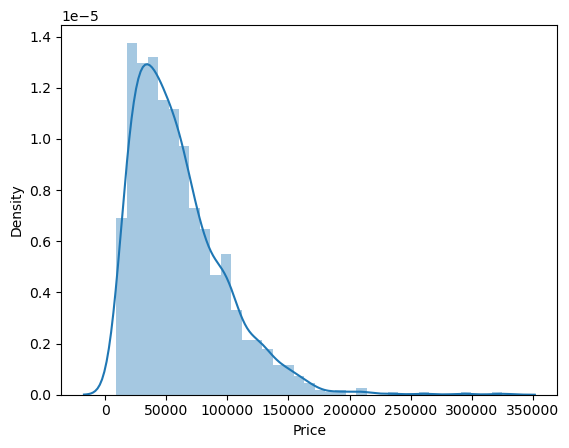

In [32]:
import seaborn as sns
sns.distplot(df['Price'])

In [33]:
upper_limit = df['Price'].mean() + 3*df['Price'].std()
lower_limit = df['Price'].mean() - 3*df['Price'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 171599.13504728777
lower limit: -51860.05599893781


In [34]:
df.loc[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]

,Inches,Ram,Weight,Price
196,17,32,3.49,324954
238,17,32,4.7,207259
610,15,32,2.5,261018
723,17,32,4.36,194972
744,15,16,2.5,175770
749,17,16,3,233845
780,17,32,4.42,191211
830,17,32,3.49,292986
1066,17,64,3.58,211788
1081,17,32,4.6,172627


In [35]:
new_df = df.loc[(df['Price'] <= upper_limit) & (df['Price'] >= lower_limit)]

In [36]:
new_df.head()

,Inches,Ram,Weight,Price
0,13,8,1.37,71378
1,13,8,1.34,47895
2,15,8,1.86,30636
3,15,16,1.83,135195
4,13,8,1.37,96095


In [37]:
new_df.reset_index(inplace=True)

In [38]:
new_df.head()

,index,Inches,Ram,Weight,Price
0,0,13,8,1.37,71378
1,1,13,8,1.34,47895
2,2,15,8,1.86,30636
3,3,15,16,1.83,135195
4,4,13,8,1.37,96095


In [39]:
df2 = new_df.copy()

In [40]:
df2.loc[(df2['Price']>=upper_limit),'Price']=upper_limit
df2.loc[(df2['Price']<=lower_limit),'Price']=lower_limit

C:\Users\KRUNAL PATEL\AppData\Local\Temp\ipykernel_3420\3633266537.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '171599.13504728777' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df2.loc[(df2['Price']>=upper_limit),'Price']=upper_limit


1291

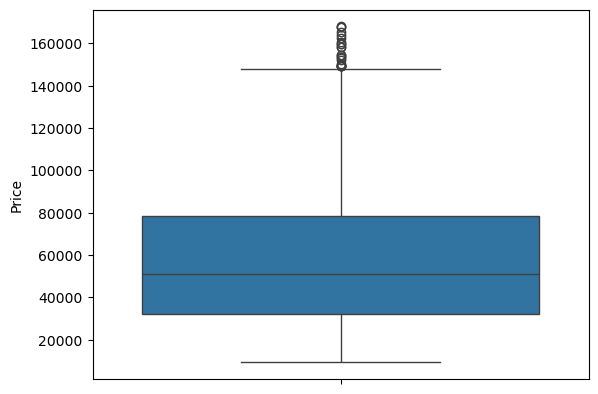

In [41]:
sns.boxplot(df2['Price'])
len(df2)

<Axes: ylabel='Price'>

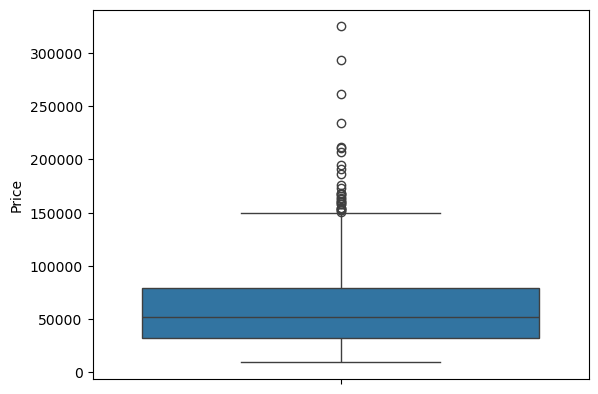

In [42]:
sns.boxplot(df['Price'])

In [43]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(31914.0, 79274.0, 47360.0)

In [44]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-39126.0, 150314.0)

In [45]:
df.loc[(df['Price'] > upper_limit) | (df['Price'] <
lower_limit)]

,Inches,Ram,Weight,Price
17,15,16,1.83,152274
190,14,16,1.42,150462
196,17,32,3.49,324954
204,15,16,2.8,162770
238,17,32,4.7,207259
247,17,16,3.6,159786
297,17,16,3.42,153705
517,15,24,2.24,158135
530,17,16,4.42,160520
563,17,8,3.4,159786


In [46]:
new_df = df.loc[(df['Price'] <= upper_limit) & (df['Price'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 1303
after removing outliers: 1274
outliers: 29


In [47]:
new_df.reset_index(inplace=True)

<Axes: ylabel='Price'>

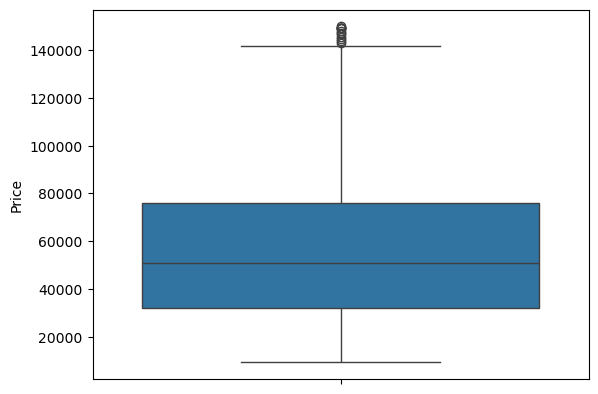

In [48]:
sns.boxplot(new_df['Price'])

In [49]:
new_df.reset_index(inplace=True)

In [50]:
new_df = df.copy()
new_df.loc[(new_df['Price']>upper_limit), 'Price'] = upper_limit
new_df.loc[(new_df['Price']<lower_limit), 'Price'] = lower_limit

<Axes: ylabel='Price'>

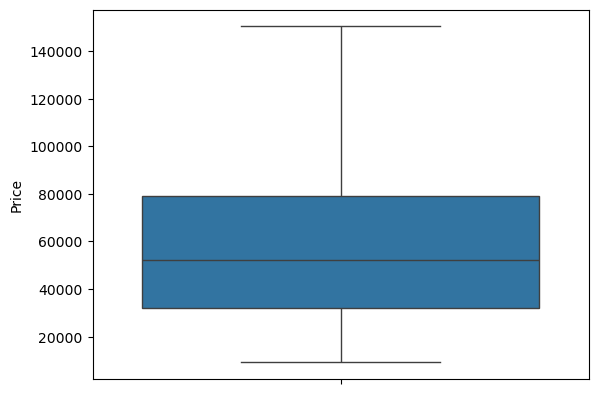

In [51]:
sns.boxplot(new_df['Price'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Inches  1303 non-null   int32 
 1   Ram     1303 non-null   int32 
 2   Weight  1303 non-null   object
 3   Price   1303 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 25.6+ KB


In [53]:
df['Price'].isnull().sum()

0

In [54]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price'], dtype='object')

In [55]:
df['Price'] = df['Price']*10000

In [56]:
x = df[['Inches', 'Ram', 'Weight']]
y = df['Price']
x.shape,y.shape

((1303, 3), (1303,))

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.20 , random_state=42)

In [59]:
x_train.shape , x_test.shape ,
y_train.shape , y_test.shape

((1042,), (261,))

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler2 = StandardScaler()

In [62]:
x_train = scaler2.fit_transform(x_train)

In [63]:
x_test = scaler2.transform(x_test)

In [64]:
x_test

array([[-1.12368039, -0.07266965, -1.46305556],
       [-1.12368039, -0.07266965, -1.37308655],
       [ 0.31474094, -0.46501048,  0.56124718],
       [ 0.31474094, -0.07266965,  0.86114388],
       [-1.84289106, -0.85735131, -1.14816402],
       [-1.12368039, -0.07266965, -1.14816402],
       [-1.12368039, -0.85735131, -0.80328281],
       [ 0.31474094, -0.07266965,  0.26135048],
       [ 1.75316228, -0.07266965,  1.98575651],
       [ 0.31474094, -0.85735131,  0.11140213],
       [ 0.31474094,  1.49669366, -0.03854622],
       [ 0.31474094, -0.07266965, -0.06853589],
       [-1.12368039, -0.07266965, -1.17815369],
       [ 0.31474094, -0.07266965,  0.41129883],
       [ 1.75316228,  1.49669366,  1.31098893],
       [-0.40446972, -0.07266965, -0.42841194],
       [-1.12368039, -0.07266965, -1.02820534],
       [ 0.31474094, -0.07266965, -0.06853589],
       [ 0.31474094,  0.712012  ,  0.41129883],
       [-1.12368039,  1.49669366, -1.8229316 ],
       [ 1.75316228,  1.49669366,  3.710

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model=LinearRegression()

In [67]:
model.fit(x_train,y_train)

LinearRegression()

In [68]:
model.score(x_test,y_test)

0.007043029959005964

In [69]:
model.intercept_

592933287.3397313

In [70]:
model.coef_

array([-4.35351861e+07,  2.60301731e+08, -4.83945584e+05])

In [71]:
y_pred_test=model.predict(x_test)

In [72]:
y_pred_test

array([6.23644925e+08, 6.23601385e+08, 4.57916335e+08, 5.59898198e+08,
       4.50549511e+08, 6.23492534e+08, 4.19071637e+08, 5.60188465e+08,
       4.96732006e+08, 3.56007038e+08, 9.68841587e+08, 5.60348113e+08,
       6.23507048e+08, 5.60115899e+08, 9.05566545e+08, 5.91833243e+08,
       6.23434481e+08, 5.60348113e+08, 7.64369893e+08, 1.03232707e+09,
       9.04405476e+08, 3.55934471e+08, 6.23231294e+08, 3.87825976e+08,
       5.91934837e+08, 7.01406888e+08, 3.56130402e+08, 3.56152172e+08,
       6.23478021e+08, 5.60406166e+08, 4.57988902e+08, 5.92029174e+08,
       6.23565101e+08, 5.60275546e+08, 5.60333599e+08, 5.60188465e+08,
       5.60188465e+08, 3.55934471e+08, 5.60043332e+08, 2.85495792e+08,
       6.23498340e+08, 5.60188465e+08, 5.60188465e+08, 9.04332909e+08,
       3.55948985e+08, 5.60406166e+08, 9.68986721e+08, 2.85669953e+08,
       5.60202979e+08, 6.23470764e+08, 5.92138024e+08, 5.60304572e+08,
       5.60369883e+08, 3.87767923e+08, 5.60072359e+08, 6.23354657e+08,
      

In [73]:
y_test

479      890840000
1022     612180000
298      265860000
1265     478980000
774      662800000
           ...    
1058     692100000
199      556770000
297     1537050000
411     1035230000
710      665460000
Name: Price, Length: 261, dtype: int32

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.294440598025269e+17
198312333.06150502
359783351.20253533


In [76]:
from sklearn.metrics import r2_score

In [77]:
score = r2_score(y_test,y_pred_test)
score

0.007043029959005964

In [78]:
df['Inches'].describe()

count    1303.000000
mean       14.595549
std         1.374514
min        10.000000
25%        14.000000
50%        15.000000
75%        15.000000
max        18.000000
Name: Inches, dtype: float64

In [79]:
df['Ram'].describe()

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

In [80]:
df['Weight'].describe()

count     1303
unique     179
top        2.2
freq       121
Name: Weight, dtype: object

In [81]:
df['Price'].describe()

count    1.303000e+03
mean     5.855105e+08
std      3.709260e+08
min     -1.956517e+09
25%      3.188500e+08
50%      5.184100e+08
75%      7.874750e+08
max      2.117880e+09
Name: Price, dtype: float64

In [82]:
df['Price'].max()

2117880000

In [83]:
leptop = pd.DataFrame(df[['Inches', 'Ram', 'Weight', 'Price']],
                         columns = ['Inches', 'Ram', 'Weight', 'Price'])

In [84]:
leptop

,Inches,Ram,Weight,Price
0,13,8,1.37,713780000
1,13,8,1.34,478950000
2,15,8,1.86,306360000
3,15,16,1.83,1351950000
4,13,8,1.37,960950000
...,...,...,...,...
1298,14,4,1.8,339920000
1299,13,16,1.3,798660000
1300,14,2,1.5,122010000
1301,15,6,2.19,407050000


In [85]:
scaler2.fit_transform(leptop)

array([[-1.16125501, -0.07519506, -1.00528323,  0.34594154],
       [-1.16125501, -0.07519506, -1.05038114, -0.28739277],
       [ 0.29436334, -0.07519506, -0.26868391, -0.75286639],
       ...,
       [-0.43344583, -1.25566695, -0.80985892, -1.25005661],
       [ 0.29436334, -0.46868569,  0.22739318, -0.4813064 ],
       [ 0.29436334, -0.86217632,  0.24242582, -1.04888808]])

In [86]:
print(x_train.shape)

(1042, 3)


In [87]:
print(leptop.shape)


(1303, 4)


In [88]:
model.predict(x_train)

array([3.56181199e+08, 3.56079605e+08, 4.58068725e+08, ...,
       4.58177575e+08, 5.60115899e+08, 5.13585082e+08])

In [89]:
import pickle as pk

In [90]:
pk.dump(model,open("model.pkl","wb"))
pk.dump(scaler2,open("scaler2.pkl","wb"))

In [91]:
df['Price'].max()
df['Inches'].max()
df['Ram'].max()
df['Weight'].max()

'4.7'

In [92]:
df['Weight'].max()

'4.7'

In [93]:
df['Ram'].max()

64

In [94]:
df['Inches'].max()

18

In [95]:
df['Price'].max()

2117880000

In [96]:
df.head()

,Inches,Ram,Weight,Price
0,13,8,1.37,713780000
1,13,8,1.34,478950000
2,15,8,1.86,306360000
3,15,16,1.83,1351950000
4,13,8,1.37,960950000


In [97]:
print(leptop.columns)


Index(['Inches', 'Ram', 'Weight', 'Price'], dtype='object')


In [98]:
print(leptop)


      Inches  Ram Weight       Price
0         13    8   1.37   713780000
1         13    8   1.34   478950000
2         15    8   1.86   306360000
3         15   16   1.83  1351950000
4         13    8   1.37   960950000
...      ...  ...    ...         ...
1298      14    4    1.8   339920000
1299      13   16    1.3   798660000
1300      14    2    1.5   122010000
1301      15    6   2.19   407050000
1302      15    4    2.2   196600000

[1303 rows x 4 columns]


In [99]:
print(leptop.head())
print(leptop.dtypes)


   Inches  Ram Weight       Price
0      13    8   1.37   713780000
1      13    8   1.34   478950000
2      15    8   1.86   306360000
3      15   16   1.83  1351950000
4      13    8   1.37   960950000
Inches     int32
Ram        int32
Weight    object
Price      int32
dtype: object


In [100]:
df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [104]:
df['Weight'] = df['Weight'].astype(float)
df['Inches'] = df['Inches'].astype(float)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Inches  1303 non-null   float64
 1   Ram     1303 non-null   int32  
 2   Weight  1303 non-null   float64
 3   Price   1303 non-null   int32  
dtypes: float64(2), int32(2)
memory usage: 30.7 KB
